In [3]:

from HelperFunctions import *
import time
import itertools
import matplotlib.pyplot as plt 
import pickle
import pandas as pd

In [2]:
def generate_sigma(p): # TODO: Needs to be finished in helper functions, for now pasted in here
    ''' 
    Generates a list 'sigma' of length p, where sigma is the variance of each feature vector dimension i.e. x_i ~ N(0, sigma_p)

    input: p (int) represents the number of features

    returns: sigma (list of floats)
        EXAMPLE:    
            n = 100
            p = 5 
            grid_dim = 5 
            sigma = [0.1, 0.2, 0.3, 0.4, 0.5]
            noise = 0.25
            degree = 3

            X, C = generate_data(n, p, grid_dim, sigma, noise, degree)
            A,b = CreateShortestPathConstraints(grid_dim)
            B1 = DirectSolution(A, b, X, C)
    ''' 
    #not done continue later
    sigma = []
    for i in range(p): 
        num = abs(np.random.normal())
        sigma.append(num)

    return sigma 

In [78]:
def problem_size_experiment(params, noise, degree):
    
    ''' 
    Runs the direct and SGD solvers with given input paraemters
    
    input: 
        dict{str:list} params: dictionary of parameter values to experiment with. Must specify 'n', 'p', and 'grid_size'
        float noise: multiplicative noise term applied to cost vector, sampled from uniform distribution in [1-noise, 1+noise]
        int degree: polynomial degree of generated cost vector. When degree=1, expected value of c is linear in x. Degree > 1 controls the amount of model misspecification.

    returns: dict{str:list} with experimental results including: runtime, SPO loss, and SPO plus loss for both direct and SGD solvers
    ''' 
    
    # Variable definitions
    experimental_results = {}
    
    direct_runtime = []
    SGD_runtime = []
    
    SPO_loss_direct = []
    SPO_loss_SGD = []
    
    SPO_plus_loss_direct= []
    SPO_plus_loss_SGD = []
    
    # Record the values we're varying (will make plotting easier)
    experimental_results['params'] = params
    
    # Define static sigma if not varying p
    if len(params['p']) == 1:
        sigma_const = generate_sigma(params['p'][0])
    
    # For each parameter combo solve the problem instance and record results
    for n, p, grid_dim in itertools.product(params['n'], params['p'], params['grid_dim']):

        # Use static sigma if not varying p in experiment 
        if len(params['p']) == 1:
            sigma = sigma_const
        else:   
            sigma = generate_sigma(p)
                    
        # Generate the dataset
        X, C = generate_data(n, p, grid_dim, sigma, noise, degree)
        
        # Create shortest path contraints
        A,b = CreateShortestPathConstraints(grid_dim)
        
        #print('for n =', n, 'p = ', p, 'grid_dim = ',grid_dim)
        # Run the direct solution and record the time
        start_direct = time.time()
        B_direct=DirectSolution(A,b, X, C)
        end_direct = time.time() - start_direct
        direct_runtime.append(end_direct)
    
        # Run the SGD solution and record the time
        start_sgd = time.time()
        B_SGD=GradientDescentSolution(A,b, X, C, batch_size=10,epsilon = 0.001) 
        end_sgd = time.time() - start_sgd
        SGD_runtime.append(end_sgd)
        
        # Record losses
        solver = ShortestPathSolver(A,b)
        SPO_loss_direct.append(SPOLoss(solver, X, C, B_direct))
        SPO_loss_SGD.append(SPOLoss(solver, X, C, B_SGD))
        SPO_plus_loss_direct.append(SPOplusLoss(solver, X, C, B_direct))
        SPO_plus_loss_SGD.append(SPOplusLoss(solver, X, C, B_SGD))

    # Add lists to results dictionary
    experimental_results['direct_runtime'] = direct_runtime
    experimental_results['SGD_runtime'] = SGD_runtime
    experimental_results['SPO_loss_direct'] = SPO_loss_direct
    experimental_results['SPO_loss_SGD'] = SPO_loss_SGD
    experimental_results['SPO_plus_loss_direct'] = SPO_plus_loss_direct
    experimental_results['SPO_plus_loss_SGD'] = SPO_plus_loss_SGD

    return experimental_results

In [49]:
params = {"n": [10], "p": [1,5], "grid_dim": [5]}
noise = 0.25
degree = 3

experiment1 = problem_size_experiment(params, noise, degree)
experiment1

for n = 10
Converged after 158 steps
for n = 10
Converged after 242 steps


{'params': {'n': [10], 'p': [1, 5], 'grid_dim': [5]},
 'direct_runtime': [0.06920886039733887, 0.09539580345153809],
 'SGD_runtime': [3.599942207336426, 5.45246696472168],
 'SPO_loss_direct': [9.600279086234991, 0.0],
 'SPO_loss_SGD': [9.600279086234991, 0.20337508510347108],
 'SPO_plus_loss_direct': [19.509591785093207, 2.0250467969162856e-14],
 'SPO_plus_loss_SGD': [35.2428782878718, 1.7626427765010981]}

In [18]:
params = {"n": [10,100], "p": [5], "grid_dim": [5]}
noise = 0.25
degree = 3

experiment2 = problem_size_experiment(params, noise, degree)
experiment2

Converged after 298 steps
Converged after 2077 steps


{'params': {'n': [10, 100], 'p': [5], 'grid_dim': [5]},
 'direct_runtime': [0.07817602157592773, 3.7434511184692383],
 'SGD_runtime': [6.818374156951904, 42.62896180152893],
 'SPO_loss_direct': [0.0, 4.5483410885032205],
 'SPO_loss_SGD': [5.552409719568414, 5.775783842850396],
 'SPO_plus_loss_direct': [-2.842170943040401e-15, 17.79834130229677],
 'SPO_plus_loss_SGD': [19.176128843484676, 23.807169356525037]}

In [19]:
params = {"n": [10], "p": [5], "grid_dim": [5,10]}
noise = 0.25
degree = 3

experiment = problem_size_experiment(params, noise, degree)
experiment

Converged after 160 steps
Converged after 207 steps


{'params': {'n': [10], 'p': [5], 'grid_dim': [5, 10]},
 'direct_runtime': [0.08296895027160645, 0.30306482315063477],
 'SGD_runtime': [3.2175416946411133, 4.890860080718994],
 'SPO_loss_direct': [0.0, 0.0],
 'SPO_loss_SGD': [0.5786515644732162, 3.5711467176893166],
 'SPO_plus_loss_direct': [-2.1316282072803006e-14, -4.263256414560601e-15],
 'SPO_plus_loss_SGD': [6.0926725193406925, 16.464020924703757]}

In [101]:

#note for experiment generation: Generate data for different instances of n and p 
def get_item(arr, lengths, indices):
    '''
    inputs: 
    arr: any list containing experiment results for combinations of n, p and g
    lengths: list of lengths of n, p, g lists
    indices: list of desired indices of params in order
    
    returns: item from array corresponding to the n, p, and g indices 

    '''
    #print(arr, lengths, indices)
    return arr[indices[0] * lengths[1] * lengths[2] + indices[1] * lengths[2] + indices[2]]



def get_y(input, type = 'direct_runtime', chosen_var = 1, fixed_indices=(5,2)):
    ''' 
    input will be in the following format (experiment)

    input = {
        'params':  {'n':[10, 50], 'p': [5], 'grid_dim': [5]},
        'direct_runtime': [0.084, 0.836],
        'SGD_runtime': [0.326, 0.266],
        'SPO_loss_SGD': [11.376, 14.916],
        'SPO_plus_loss_direct': [2.8....., 29.5......],
        'SPO_plus_loss_SGD': [42.379, 42.927]
    } 

    type: 'direct_runtime', 'SGD_runtime','SPO_loss_SGD', 'SPO_plus_loss_direct', 'SPO_plus_loss_SGD'
    chosen_var: variable on x-axis; 'n'=0, 'p'=1, 'grid_dim'=2
    fixed_indices: a tuple of the two indices at which to fix the other params 


    returns: 
        change_vals: the values of the changing variable
        y: array for chosen variable

    '''

    if chosen_var == 0:
        change_vals = input['params']['n']
    elif chosen_var == 1:
        change_vals = input['params']['p']
    else: 
        change_vals = input['params']['grid_dim']


    lengths = [
        len(input['params']['n']),
        len(input['params']['p']),
        len(input['params']['grid_dim'])
    ]

    type_vals = input[type]
    
    indices = []
    fixed_progress = 0
   
    for i in range(3):
        if i == chosen_var:
            indices.append(0)
        else:
            indices.append(fixed_indices[fixed_progress])
            fixed_progress += 1
    y = []
    
    for i in range(len(change_vals)):
        y.append(get_item(type_vals, lengths, indices))
        indices[chosen_var] += 1

    #plt.plot(change_vals, y)
    return (change_vals, y)

        

In [16]:
# example run

params = {"n": range(1,21), "p": [3, 5, 7], "grid_dim": [5, 10]}
noise = 0.25
degree = 2

example_experiment = problem_size_experiment(params, noise, degree)

# get the direct_runtime for all given values of n, while keeping p=5 (aka index 1), and grid_dim=5 (aka index 0)
change_vals, direct = get_y(example_experiment, type='direct_runtime', chosen_var=0, fixed_indices=(1, 0))
# same but for SGD
change_vals, sgd = get_y(example_experiment, type='SGD_runtime', chosen_var=0, fixed_indices=(1, 0))



NameError: name 'problem_size_experiment' is not defined

In [17]:
# plotting
plt.plot(change_vals, direct, label = 'direct_runtime')
plt.plot(change_vals, sgd, label = 'SGD_runtime')
plt.legend()
plt.show()

NameError: name 'change_vals' is not defined

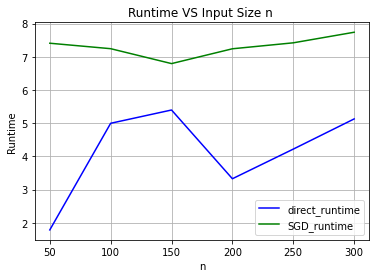

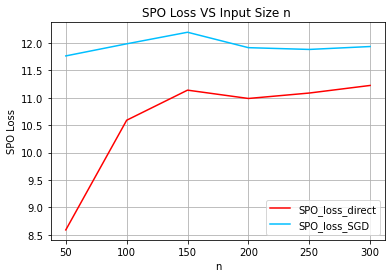

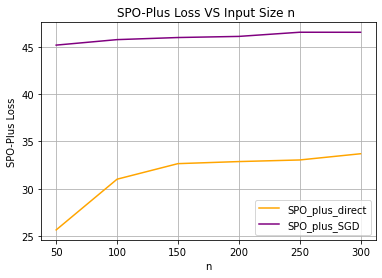

n    p  grid_dim  metric              
50   5  5         direct_runtime           1.785191
                  SGD_runtime              7.406419
                  SPO_loss_direct          8.587638
                  SPO_loss_SGD            11.762786
                  SPO_plus_loss_direct    25.656506
                  SPO_plus_loss_SGD       45.169684
100  5  5         direct_runtime           4.995880
                  SGD_runtime              7.241769
                  SPO_loss_direct         10.588930
                  SPO_loss_SGD            11.983483
                  SPO_plus_loss_direct    31.011290
                  SPO_plus_loss_SGD       45.749865
150  5  5         direct_runtime           5.395769
                  SGD_runtime              6.792922
                  SPO_loss_direct         11.138150
                  SPO_loss_SGD            12.194812
                  SPO_plus_loss_direct    32.654309
                  SPO_plus_loss_SGD       45.971546
200  5  5         direct_

In [171]:
# unpickling 

SPOresults = pd.read_pickle('SPOresults.pkl')
SPOresults.head(10000)

# index rows by cols
SPO_results_mean = SPOresults.mean(numeric_only= True, axis=1)
SPO_results_mean.head()

x = [50,100,150,200,250,300]

# plotting 
# using df - just for ease of reading 
df = SPO_results_mean
direct_runtime = []
SGD_runtime = []
SPO_loss_direct = []
SPO_loss_SGD = []
SPO_plus_loss_direct = []
SPO_plus_loss_SGD = []
for i in range(len(x)):
    direct_runtime.append(df.iloc[ 6 * i])
    SGD_runtime.append(df.iloc[6 * i + 1])
    SPO_loss_direct.append(df.iloc[6 * i + 2])
    SPO_loss_SGD.append(df.iloc[6 * i + 3])
    SPO_plus_loss_direct.append(df.iloc[6 * i + 4])
    SPO_plus_loss_SGD.append(df.iloc[6 * i + 5])

plt.plot(x, direct_runtime , label = 'direct_runtime', color = 'b')
plt.plot(x, SGD_runtime, label = 'SGD_runtime', color = 'g')
plt.xlabel('n')
plt.ylabel('Runtime')
plt.title('Runtime VS Input Size n ')
plt.grid()
plt.legend()
plt.show()

plt.plot(x, SPO_loss_direct , label = 'SPO_loss_direct', color = 'red')
plt.plot(x, SPO_loss_SGD, label = 'SPO_loss_SGD', color = 'deepskyblue')
plt.xlabel('n')
plt.ylabel('SPO Loss')
plt.title('SPO Loss VS Input Size n ')
plt.legend()
plt.grid()
plt.show()

plt.plot(x, SPO_plus_loss_direct, label = 'SPO_plus_direct', color = 'orange')
plt.plot(x, SPO_plus_loss_SGD, label = 'SPO_plus_SGD', color = 'purple')
plt.xlabel('n')
plt.ylabel('SPO-Plus Loss')
plt.title('SPO-Plus Loss VS Input Size n ')
plt.legend()
plt.grid()
plt.show()
#SPO_results_mean.head(1000)